In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Feature Scaling
# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
scaler.fit(X_train) # Compute the mean and std to be used for later scaling.
X_train = scaler.transform(X_train) #Perform standardization by centering and scaling.
X_test = scaler.transform(X_test)#Perform standardization by centering and scaling.

# Training and Predictions
# Classifier implementing the k-nearest neighbors vote.
# parameters:
  # n_neighbors : int, default=5  / Number of neighbors to use by default for kneighbors queries.
  # algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’ / Algorithm used to compute the nearest neighbors
  # leaf_size : int, default=30 / Leaf size passed to BallTree or KDTree
  # p : int, default=2 / Power parameter for the Minkowski metric
  # metric : str or callable, default=’minkowski’ / The distance metric to use for the tree
  # metric_params : dict, default=None / Additional keyword arguments for the metric function.
  # n_jobs : int, default=None / The number of parallel jobs to run for neighbors search
classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the k-nearest neighbors classifier from the training dataset.
classifier.fit(X_train, y_train)

# Predict the class labels for the provided data.
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred)) # 혼동행렬 생성
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 16  0]
 [ 0  3 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.84      1.00      0.91        16
           2       1.00      0.81      0.90        16

    accuracy                           0.93        45
   macro avg       0.95      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



Text(0, 0.5, 'Mean Error')

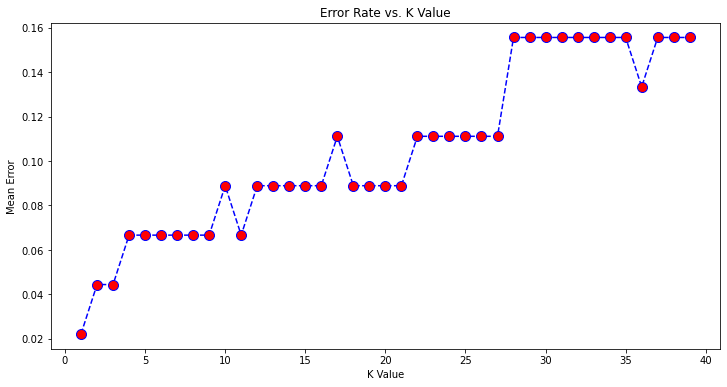

In [5]:
error = []

# n_neighbors 값에 따른 에러율 변화
for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize =(12, 6))
plt.plot(range(1, 40), error, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')